# Assignment 3

## Instructions 
For full credit, earn 100 points. __Problem C__ is big, and worth 100 points on its own, with its own bonus questions. __Problem A__ and __Problem B__ are worth 35 and 25 respectively, so full credit requires significant progress on __Problem C__, but __Problem A__ and __Problem B__ are more closed-ended, i.e., likely can be finished more quickly. Please indicate clearly which components of the assignment are completed as you fill out your solution and turn it in.

## Problem A _(35 points)_
For this problem, you will be working with [flight data from the Bureau of Transporttaion Statistics](http://stat-computing.org/dataexpo/2009/the-data.html). For development, these data are a little largeish (~700Mb/7 million flights) for prototyping, so two truncated files are provided under `data/2007-10k.csv` and `data/2008-10k.csv`. __Important: it's strongly recommended to prototype and develop code using the truncated data.__

__Design note:__ The code you will develop as part of this problem's solution should be generalized so that it works when there are more than just two years' worth of data, i.e. when there are more files than just `2007.csv` and `2008.csv`.

__To work with the full dataset,__ go to the link and download the data files for 2007 and 2008.  Put these files in the `data/` directory and extract them. (The files can be extracted from the command line by navigating into `data/` and running `bunzip2 200{7..8}.csv.bz2`.

__A1.__ _(5 points)_ Write a function that takes a year as an input argument and loads the data for that year into a `pandas` dataframe, then drops the rows in the dataframe that have a null in any of these columns: "Year", "Month", "DayofMonth", "DepTime", "Origin", and "Dest", and then returns this dataframe. 

In [1]:
import pandas as pd
from pprint import pprint
from collections import defaultdict

In [ ]:
filter_keys = ["Year", "Month", "DayofMonth", "DepTime", 
                   "Origin", "Dest"]

Following cell allows you to load all csv's you want and then stores them in dict. This way, in each function we can just access the Dataframe for each year without having to read in the csv.

In [5]:
year_df = defaultdict(dict)
# years_ must contain all files you want to use
years_ = ['2007', '2008']
for year in years_:
    file_name = 'data/' + year +'.csv'
    data = pd.read_csv(file_name)
    year_df[year] = data

done


In [6]:
def data_to_pandas_test(year):
    data = year_df[year]
    df = data.dropna(subset=filter_keys)
    return df
data_frame = data_to_pandas_test('2007')
display(data_frame[:20])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,...,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,...,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,...,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,...,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,...,3,9,0,NaN,0,0,0,0,0,0
5,2007,1,1,1,1430.0,1420,1553.0,1550,WN,2386,...,2,7,0,NaN,0,0,0,0,0,0
6,2007,1,1,1,1936.0,1840,2217.0,2130,WN,409,...,5,7,0,NaN,0,46,0,0,0,1
7,2007,1,1,1,944.0,935,1223.0,1225,WN,1131,...,4,9,0,NaN,0,0,0,0,0,0
8,2007,1,1,1,1537.0,1450,1819.0,1735,WN,1212,...,5,7,0,NaN,0,20,0,0,0,24
9,2007,1,1,1,1318.0,1315,1603.0,1610,WN,2456,...,5,8,0,NaN,0,0,0,0,0,0


__A2.__ _(10 points)_ Update the function so that before returning the dataframe, it creates a new column in the dataframe that contains `datetime` objects holding the departure date of the flight.

In [7]:
def data_to_pandas_(year):
    data = year_df[year]
    df = data.dropna(subset=filter_keys)
    date_time = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.DayofMonth))
    date_time_series = pd.Series(date_time)
    date_time_df = pd.DataFrame({'DepDate': date_time_series})
    new_df = pd.concat([df, date_time_df], axis=1)
    return new_df
data_frame = data_to_pandas_('2007')
display(data_frame['DepDate'])

0         2007-01-01
1         2007-01-01
2         2007-01-01
3         2007-01-01
4         2007-01-01
5         2007-01-01
6         2007-01-01
7         2007-01-01
8         2007-01-01
9         2007-01-01
10        2007-01-01
11        2007-01-01
12        2007-01-01
13        2007-01-01
14        2007-01-01
15        2007-01-01
16        2007-01-01
17        2007-01-01
18        2007-01-01
19        2007-01-01
20        2007-01-01
21        2007-01-01
22        2007-01-01
23        2007-01-01
24        2007-01-01
25        2007-01-01
26        2007-01-01
27        2007-01-01
28        2007-01-01
29        2007-01-01
             ...    
7453184   2007-12-15
7453185   2007-12-15
7453186   2007-12-15
7453187   2007-12-15
7453188   2007-12-15
7453189   2007-12-15
7453190   2007-12-15
7453191   2007-12-15
7453192   2007-12-15
7453193   2007-12-15
7453194   2007-12-15
7453195   2007-12-15
7453196   2007-12-15
7453197   2007-12-15
7453198   2007-12-15
7453200   2007-12-15
7453201   200

In [11]:
display(data_frame[data_frame['DepDate'] == '2007-12-31'].head())

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
6930889,2007,12,31,1,1851.0,1845,2048.0,2040,WN,228,...,15,0,NaN,0,0,0,0,0,0,2007-12-31
6930890,2007,12,31,1,908.0,905,1418.0,1440,WN,2126,...,7,0,NaN,0,0,0,0,0,0,2007-12-31
6930891,2007,12,31,1,1435.0,1435,1706.0,1710,WN,45,...,14,0,NaN,0,0,0,0,0,0,2007-12-31
6930892,2007,12,31,1,1128.0,1130,1347.0,1405,WN,438,...,7,0,NaN,0,0,0,0,0,0,2007-12-31
6930893,2007,12,31,1,1636.0,1630,1900.0,1905,WN,750,...,9,0,NaN,0,0,0,0,0,0,2007-12-31


__A3.__ _(5 points)_ Update the function so that it also takes an airport code as an input argument, and returns a dataframe of flights originating from that airport that occurred in the specified year. \[__Hint__: while prototyping, to test your code choose an `'Origin'` that's in the truncated file, like  Philly's airport!\]

In [12]:
def find_origin(year, code):
    code = code.upper()
    data = year_df[year]
    df = data.dropna(subset=filter_keys)
    date_time = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.DayofMonth))
    date_time_series = pd.Series(date_time)
    date_time_df = pd.DataFrame({'DepDate': date_time_series})
    new_df = pd.concat([df, date_time_df], axis=1)
    filtered_origin = new_df.loc[new_df.Origin == code]
    return filtered_origin

data_frame_or = find_origin('2007', 'STl')
display(data_frame_or.Origin)

72         STL
73         STL
74         STL
75         STL
76         STL
77         STL
78         STL
79         STL
80         STL
81         STL
82         STL
83         STL
84         STL
85         STL
86         STL
87         STL
88         STL
89         STL
90         STL
91         STL
92         STL
93         STL
94         STL
95         STL
96         STL
97         STL
98         STL
99         STL
100        STL
101        STL
          ... 
7442005    STL
7442585    STL
7443192    STL
7443225    STL
7443377    STL
7443952    STL
7444489    STL
7444518    STL
7444638    STL
7445096    STL
7445639    STL
7446364    STL
7446948    STL
7447128    STL
7447710    STL
7448287    STL
7448317    STL
7448454    STL
7448977    STL
7449570    STL
7449600    STL
7450303    STL
7450914    STL
7450947    STL
7451097    STL
7451677    STL
7452288    STL
7452321    STL
7452471    STL
7453044    STL
Name: Origin, Length: 63564, dtype: object

__A4.__ _(5 points)_ Using this function, create dataframes holding the flight data for Philadelphia International Airport (PHL) for 2007 and 2008. Then use the `.groupby()` method to obtain the busiest month of the year for both years. Did this change from 2007 to 2008? 

In [14]:
import calendar

In [15]:
years_of_interest = ['2007', '2008']
airport_code = 'PHL'

for year in years_of_interest:
    phl_info = find_origin(year, airport_code)
    groups = phl_info.groupby(['Month'])
    busiest_month_count = 0
    for group in groups:
        month_count = group[1]['Month'].count()
        month_num = int(group[1]['Month'].mean())
        if month_count > busiest_month_count:
            busiest_month = calendar.month_name[month_num]
            busiest_month_count = month_count
    print('%s was the busiest month in %s with %s flights out of %s.\n' % (busiest_month, year, busiest_month_count, 
                                                                           airport_code))

May was the busiest month in 2007 with 8928 flights out of PHL.

July was the busiest month in 2008 with 8698 flights out of PHL.



__A5.__ _(10 points)_ Update the function so that instead of a year value, it now takes two dates as input, denoting a range. The function must now return all flights originating from the specified airport within this range of time. If the range spans multiple years, the function should load data from all necessary files and return a single dataframe containing all the data within the specified range of time.

Using this function, get all the flight data for flights from PHL for all of 2007 and 2008. Then, create a daily count of flights over all of the days in the two years.

In [16]:
import dateparser

In [33]:
def find_origin_timeframe(date_1, date_2, code):
    code = code.upper()
    date_1 = dateparser.parse(date_1)
    date_2 = dateparser.parse(date_2)
    date_start = min(date_1, date_2)
    date_end = max(date_1, date_2)
    if date_start == date_end:
        print('Invalid dates entered')
        return
    year_1 = date_start.year
    year_2 = date_end.year
    data = year_df[str(year_1)]
    if year_1 != year_2:
        data_2 = year_df[str(year_2)]
        data = data.append(data_2, ignore_index=True)
    df = data.dropna(subset=filter_keys)
    date_time = pd.to_datetime(dict(year=df.Year, month=df.Month, day=df.DayofMonth))
    date_time_series = pd.Series(date_time)
    date_time_df = pd.DataFrame({'DepDate': date_time_series})
    new_df = pd.concat([df, date_time_df], axis=1)
    filtered_origin = new_df.loc[new_df.Origin == code]
    filtered_origin = filtered_origin[(filtered_origin.DepDate >= date_start) & (filtered_origin.DepDate <= date_end)]
    return filtered_origin

In [34]:
flight_data = find_origin_timeframe('2007-01-01', '2008-12-31', airport_code)
print('Ding!')

Ding!


In [35]:
display(flight_data.head())
display(flight_data.tail())  # Weird that tail ends on 13th of December 2008, but sample returns an entry on 12/23/2018
display(flight_data.sample(30))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
2453,2007,1,2,2,1104.0,1105,1158.0,1205,WN,262,...,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02
2454,2007,1,2,2,1616.0,1615,1734.0,1715,WN,899,...,34.0,0,NaN,0,0.0,0.0,19.0,0.0,0.0,2007-01-02
2455,2007,1,2,2,829.0,830,934.0,945,WN,2023,...,24.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02
2456,2007,1,2,2,1834.0,1820,1954.0,1940,WN,2256,...,29.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02
2457,2007,1,2,2,700.0,655,806.0,815,WN,2939,...,10.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-01-02


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
14462518,2008,12,13,6,1131.0,1131,1335.0,1355,DL,1013,...,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14462519,2008,12,13,6,1233.0,1240,1448.0,1457,DL,1015,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14462521,2008,12,13,6,1354.0,1356,1606.0,1618,DL,1017,...,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14462523,2008,12,13,6,1659.0,1655,1902.0,1920,DL,1019,...,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13
14462650,2008,12,13,6,657.0,705,955.0,1020,DL,1187,...,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
1103104,2007,2,17,6,912.0,915,1200.0,1200,AA,1859,...,20.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-02-17
13479431,2008,11,29,6,708.0,710,939.0,1000,WN,1436,...,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-11-29
13984137,2008,12,23,2,2002.0,1950,2234.0,2245,WN,2980,...,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-23
8327172,2008,2,21,4,1219.0,1215,1516.0,1510,US,1651,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-02-21
6515882,2007,11,19,1,812.0,815,1104.0,1127,US,1417,...,33.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-11-19
4659797,2007,8,15,3,2036.0,2035,2155.0,2218,US,1492,...,12.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-08-15
12928007,2008,10,30,4,1859.0,1825,2128.0,2115,WN,1392,...,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-10-30
9268578,2008,4,10,4,1515.0,1515,1632.0,1645,WN,233,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-04-10
5429793,2007,9,6,4,624.0,627,813.0,825,NW,395,...,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-09-06
5234198,2007,9,20,4,805.0,805,916.0,932,UA,429,...,22.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0,2007-09-20


In [36]:
daily_counts = flight_data.groupby('DepDate').size().to_frame('count').reset_index()
display(daily_counts)

,DepDate,count
0,2007-01-01,267
1,2007-01-02,300
2,2007-01-03,298
3,2007-01-04,297
4,2007-01-05,282
5,2007-01-06,230
6,2007-01-07,262
7,2007-01-08,289
8,2007-01-09,294
9,2007-01-10,294


__BONUS.__ _(5 points)_ Display the daily counts in a plot. 

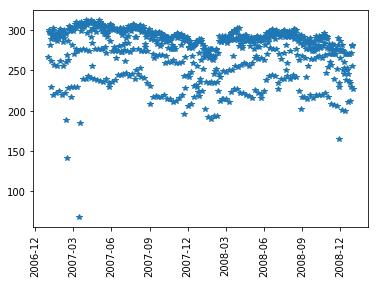

In [38]:
import matplotlib.pyplot as plt

df = daily_counts.sort_values('DepDate', ascending=True)
plt.plot(df['DepDate'], df['count'], '*')
plt.xticks(rotation='vertical')
plt.show()